This will be an implementation of a fully connected Neural Network to classify MNIST digits. Really simple and should be reasonably accurate.

I will also not use the preloaded MNIST training set from PyTorch. This is since I would like to know how the framework works with various types of data and all the utilities it provides for loading data from external sources and how we can make those things play nice.

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision.utils import make_grid
import torchvision.transforms as transforms
import torch.nn.functional as F

import numpy as np
from mnist import MNIST

import scipy.misc

import matplotlib.pyplot as plt

In [3]:
mndata = MNIST(path='./data/mnist')
images, labels = mndata.load_training()

In [4]:
# convert to numpy and normalize
images = np.array(images) / 255
labels = np.array(labels)

Plot one of the images just to make sure everything's in a good spot so far.

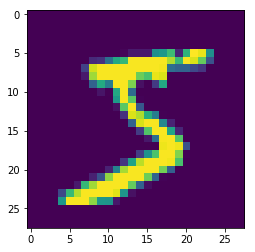

In [5]:
plt.imshow(images[0].reshape(28,28))
plt.show()

I'm also just going to peek at the label to make sure everything seems legit.

In [6]:
labels[0]

5

All good so far. Now, we can proceed with defining the Network

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 25)
        self.fc2 = nn.Linear(25, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x
    
net = Net()

Just converting image arrays to numpy ndarray's so we can actually work with them and convert them to torch Tensors

In [8]:

images_tensor = torch.from_numpy(images)
labels_tensor = torch.from_numpy(labels)

dataset = torch.utils.data.TensorDataset(images_tensor, labels_tensor)

Set up loss, optimizer and data loader.

Loop over epochs and iterate over the dataloader.

In loop, get next batch, propagate examples through network. Subsequently zero out gradients, calculate loss, back prop errors. Make optimizer take a step.

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.00001)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=32)
num_epochs = 10
loss_progress = []
for i in range(num_epochs):
    for j, data in enumerate(trainloader):
        inputs, output = data
        inputs, output = Variable(inputs.float()), Variable(output.long())
        optimizer.zero_grad()
        out = net(inputs)
        loss = criterion(out, output)
        loss.backward()
        optimizer.step()
        if j % 32 == 0:
            loss_progress.append(loss.data[0])
    

Plot the loss to make sure it decreased as time rolled by

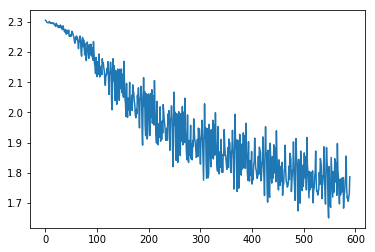

In [10]:
plt.plot(loss_progress)
plt.show()

Now, we're going to try some predictions. We'll have to load up the test set, do some previewing and then run it through our network

In [11]:
images, labels = mndata.load_testing()
images = np.array(images) / 255
labels = np.array(labels)


In [33]:
def plot_images(images):
    fig = plt.figure()
    for i, image in enumerate(images):
        fig.add_subplot(1, len(images), i+1)
        plt.imshow(image)
    
    plt.show()
        

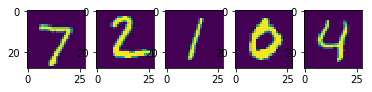

In [35]:
plot_images(images[0:5].reshape(5,28,28))

Now let's run p

In [36]:


_, index = out.max(1)
print(index)

Variable containing:
 7
 2
 1
 0
 4
[torch.LongTensor of size 5]

